# Project Phase 1

#### importing required libraries

In [2]:
import numpy as np
import pandas as pd

# plotting libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# used to impute missing values of categorical and numerical data types:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# used for normalzing values:
from sklearn.preprocessing import StandardScaler

# 1. Taking a high level view of data

In this section, we want to find out to quickly find out the high level summary of the kind of features present in our dataset, printout the basic statistics for the datasets and check the `dtypes` for the features.

In [3]:
df = pd.read_csv("D:\\Download D\\Amex\\Dataset\\train.csv")

In [4]:
# printing the properties of the dataset:
print("The shape of the dataframe is:\n", df.shape)

The shape of the dataframe is:
 (45528, 19)


In [5]:
df['prev_defaults'].value_counts()

prev_defaults
0    43060
1     2172
2      296
Name: count, dtype: int64

Deleting extra white space characters from our datasets at the end or beginning of strings

In [6]:
# getting rid of white spaces at the beginning and end of values:
df = df.replace('\n','', regex=True)

Printing out the `dtypes` for the all of the feature columns:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

Checking for the presence of empty values in each of the features in the dataset:

In [8]:
df.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [9]:
# collecting the column names with missing values into an array:
missing_array = ['owns_car', 'no_of_children', 'no_of_days_employed', 'total_family_members', 'migrant_worker', 'yearly_debt_payments']

# 2. Dealing with Categorical Missing values 

In [10]:
# The total number of missing values in the entire table is:
df.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

### Steps followed when dealing with missing values:
1. since the number of missing values is less than 5% of the number of rows, we are not going to drop those corresponding rows. We will fill the missing vlaues using various imputation techniques

2. the idea is to fill missing categorical values with the most commonly occuring value (or mode).

In [11]:
# first capturing all the categorical features as a filter:
categorical_features = df.select_dtypes(include=['object']).columns.values

# and numerical feature names into another array:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.values

### Imputing Categorical values

In [12]:
imputer1 = SimpleImputer(strategy = "most_frequent")

#fitting the data
imputer1.fit(df[categorical_features])

# Applying the fiting data onto the dataframe
df[categorical_features] = imputer1.transform(df[categorical_features])

# checking if the categorical features has any missing values or not:
df[categorical_features].isnull().sum()

customer_id        0
name               0
gender             0
owns_car           0
owns_house         0
occupation_type    0
dtype: int64

# 3. Dealing with Numerical Missing Values

### Steps followed when dealing with missing values:
1. since the number of missing values is less than 5% of the number of rows, we are not going to drop those corresponding rows. We will fill the missing vlaues using various imputation techniques

2. the idea is to fill missing numerical values with the mean value of the feature of the 5 nearest neighbors for the missing point

### Imputing Numerical values

In [13]:
imputer2 = KNNImputer()

#fitting the data
imputer2.fit(df[numerical_features])

# Applying the fitting data onto the dataframe:
df[numerical_features] = imputer2.transform(df[numerical_features])

# checking if the numerical features has any missing values or not:
df[numerical_features].isnull().sum()

age                        0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

### Checking if the entire table now has any missing values or not:

In [14]:
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

# 4. Handling mismatched string formats

The idea here is to convert all the string values in the table to lower cases, so there is consistency in the data and takes care of duplicates for example:
`John Doe` vs `John doe` vs `john doe` vs `john Doe`

In [15]:
# querying for each column whose dtype is 'str' in the dataset and converting them all to lower case strings:
for text in categorical_features:
    df.update(df[text].str.lower())
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,cst_115179,ita bose,46.0,f,n,y,0.0,107934.04,612.0,unknown,1.0,1.0,33070.28,18690.93,73.0,544.0,2.0,1.0,1.0
1,cst_121920,alper jonathan,29.0,m,n,y,0.0,109862.62,2771.0,laborers,2.0,0.0,15329.53,37745.19,52.0,857.0,0.0,0.0,0.0
2,cst_109330,umesh desai,37.0,m,n,y,0.0,230153.17,204.0,laborers,2.0,0.0,48416.60,41598.36,43.0,650.0,0.0,0.0,0.0
3,cst_128288,rie,39.0,f,n,y,0.0,122325.82,11941.0,core staff,2.0,0.0,22574.36,32627.76,20.0,754.0,0.0,0.0,0.0
4,cst_151355,mccool,46.0,m,y,y,0.0,387286.00,1459.0,core staff,1.0,0.0,38282.95,52950.64,75.0,927.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,cst_130421,doris,55.0,f,n,n,2.0,96207.57,117.0,unknown,4.0,0.0,11229.54,29663.83,82.0,907.0,0.0,0.0,0.0
45524,cst_136670,luciana,31.0,f,n,y,0.0,383476.74,966.0,accountants,2.0,1.0,43369.91,139947.16,32.0,679.0,0.0,0.0,0.0
45525,cst_145435,jessica,27.0,f,n,y,0.0,260052.18,1420.0,core staff,2.0,0.0,22707.51,83961.83,46.0,727.0,0.0,0.0,0.0
45526,cst_130913,tessa,32.0,m,y,n,0.0,157363.04,2457.0,laborers,2.0,0.0,20150.10,25538.72,92.0,805.0,0.0,0.0,0.0


# 5. Checking Skewness in the dataset

In [16]:
from scipy.stats import skew

# select numeric columns 
numeric_columns = df.select_dtypes(include = [np.number])

# Calculating the skewness for column (numeric)
skewness = numeric_columns.apply(lambda i: skew(i.dropna()))

# Printing the skewness in the dataset to check the normal distribution and outlier in the dataset
print(skewness)

age                          0.003975
no_of_children               1.832887
net_yearly_income          203.676793
no_of_days_employed          1.671904
total_family_members         0.925126
migrant_worker               1.675339
yearly_debt_payments         1.721360
credit_limit               200.380565
credit_limit_used(%)        -0.127445
credit_score                -0.302419
prev_defaults                4.680850
default_in_last_6months      4.103585
credit_card_default          3.066469
dtype: float64


# 6. Handling Outliers

In this section, we will try to find if there are outliers in each of the features and deal with them. The general idea is to discard values that our further than 3 ***Standard Deviations*** away from the mean. That means we will have approximately 99% of the data but won't have the influence of outliers when we analyze the data in the future to make decisions

C:\Users\chira\AppData\Local\Temp\ipykernel_24308\3648501480.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["credit_limit"])


<Axes: xlabel='credit_limit', ylabel='Density'>

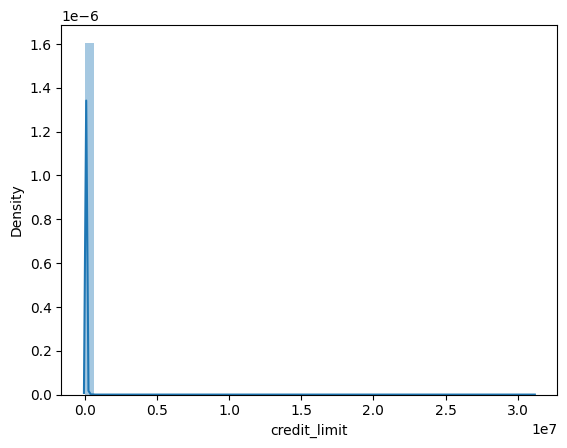

In [17]:
# Fixing the outlier for the column credit limit first
sns.distplot(df["credit_limit"])

As the column `credit_limit` is heavily skewed to the positive side, we can remove outlier using quantile range

In [18]:
# declaring quantiles as per graph as a filter:
q = df['credit_limit'].quantile(0.99)
q

145102.3042

In [19]:
# updating our dataset with the above filter q to weed out outliers in 'credit_limit' column:
df = df[df['credit_limit']<q]

C:\Users\chira\AppData\Local\Temp\ipykernel_24308\3955434499.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['credit_limit'])


<Axes: xlabel='credit_limit', ylabel='Density'>

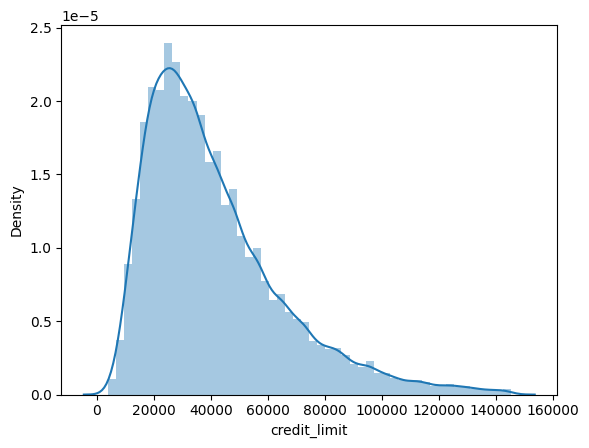

In [20]:

sns.distplot(df['credit_limit'])

### Again checking the skewness

In [21]:
# select numeric columns 
numeric_columns = df.select_dtypes(include = [np.number])

# Calculating the skewness for column (numeric)
skewness = numeric_columns.apply(lambda i: skew(i.dropna()))

# Printing the skewness in the dataset to check the normal distribution and outlier in the dataset
print(skewness)

age                        0.002191
no_of_children             1.831942
net_yearly_income          1.660654
no_of_days_employed        1.661389
total_family_members       0.924008
migrant_worker             1.674238
yearly_debt_payments       1.399142
credit_limit               1.303467
credit_limit_used(%)      -0.128263
credit_score              -0.302336
prev_defaults              4.670004
default_in_last_6months    4.094065
credit_card_default        3.064277
dtype: float64


As per the kurtosis, for normal distribution the skewness of the data should lie between -3 to +3, Here in out dataset, all columns lie in this range except 
* `prev_defaults` 
* `default_in_last_6months`

But as these columns are categorical and plays a significant role in our dependent variable prediction, we decided not to remove / impute any of its value

### Plotting distplot of all numeric column to make sure we have fixed all the outliers, The following graph also ensures that the data is normally distributed 

C:\Users\chira\AppData\Local\Temp\ipykernel_24308\1020793304.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[axes[0]], ax=axs[0, 0])
C:\Users\chira\AppData\Local\Temp\ipykernel_24308\1020793304.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[axes[1]], ax=axs[0, 1])
C:\Users\chira\A

Text(0.5, 1.0, 'credit score')

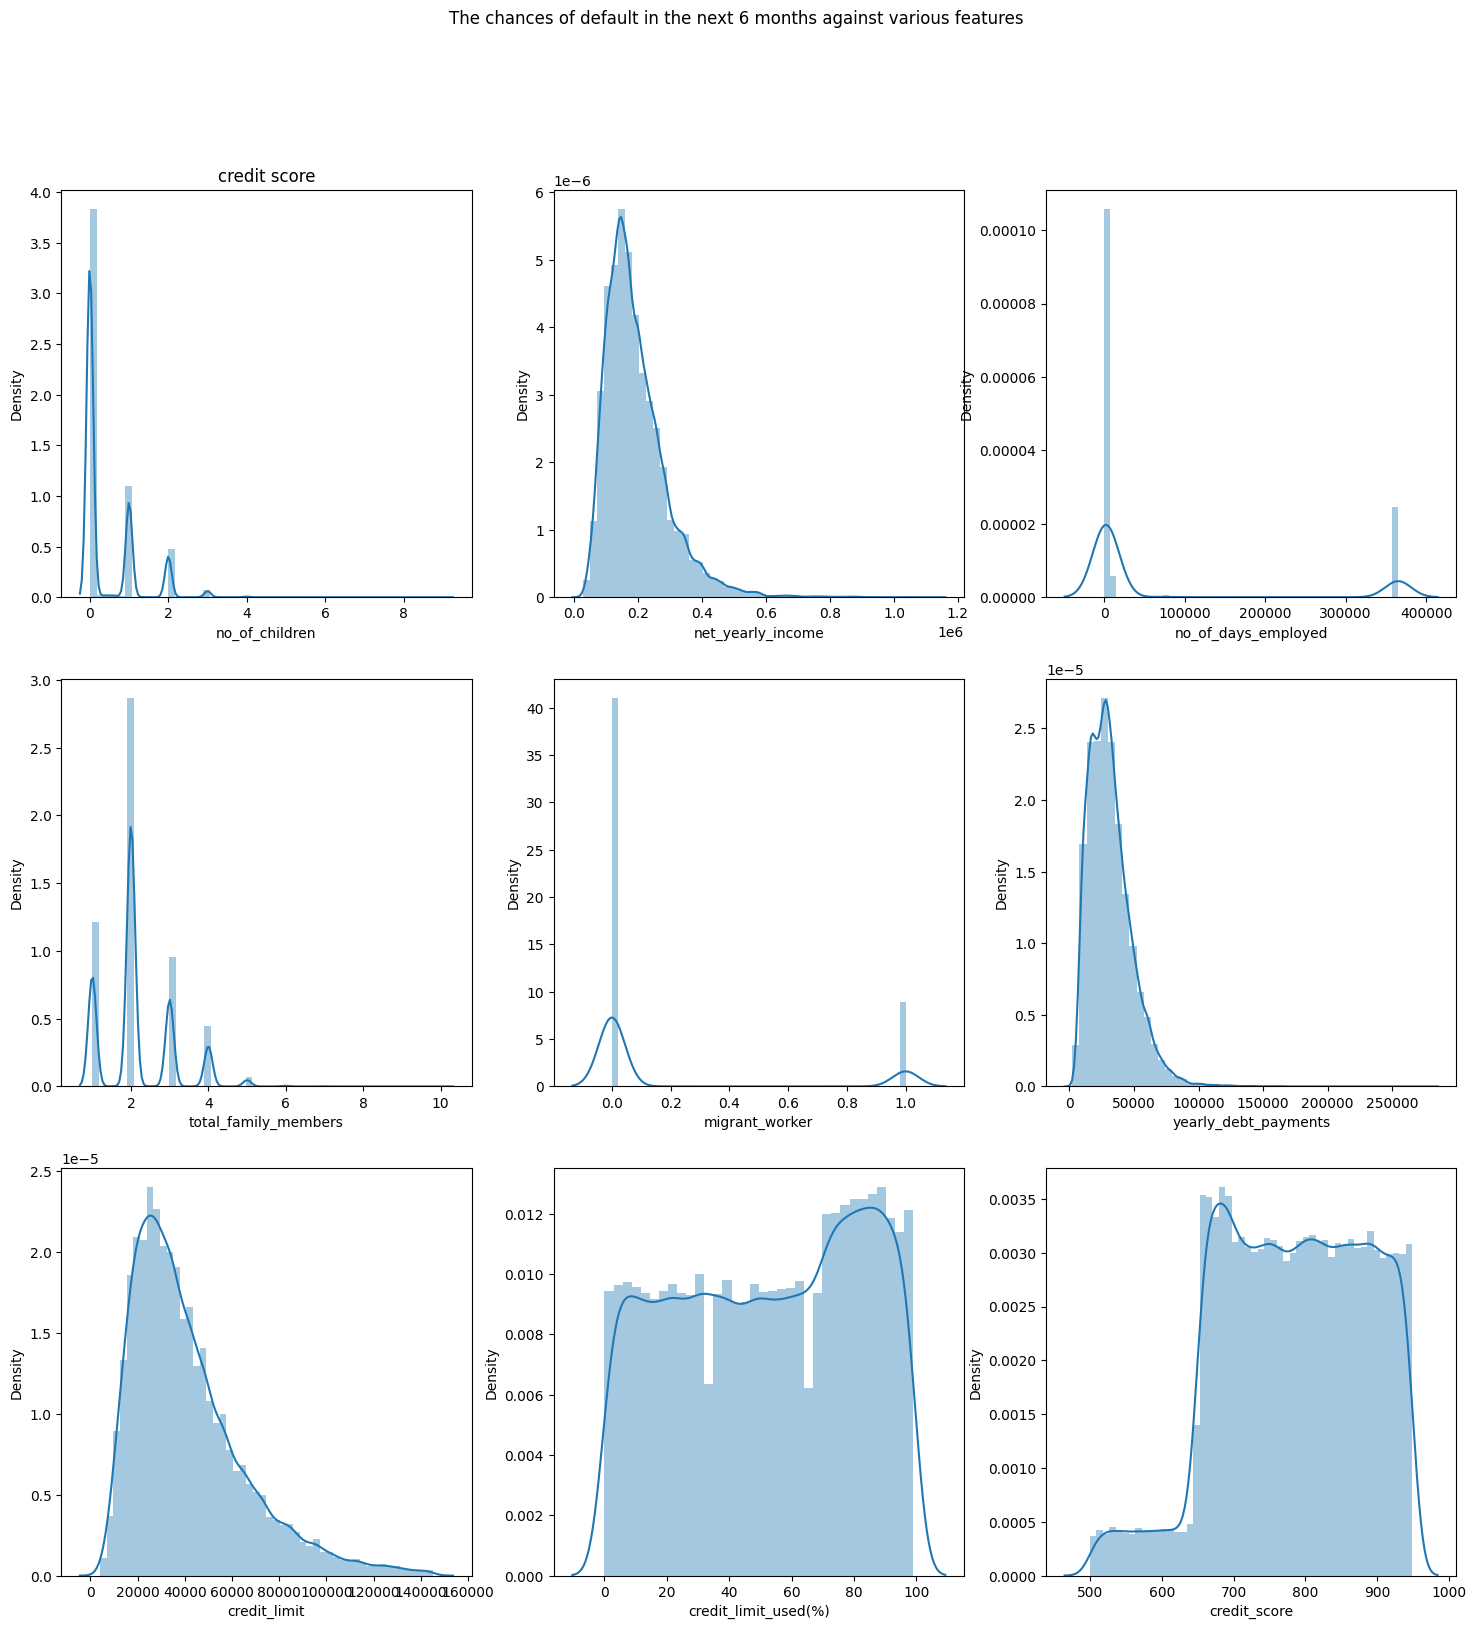

In [22]:
axes = skewness.index.tolist()[1:10]

fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle("The chances of default in the next 6 months against various features")

sns.distplot(df[axes[0]], ax=axs[0, 0])
axs[0, 0].set_title(axes[0].replace('_', ' '))

sns.distplot(df[axes[1]], ax=axs[0, 1])
axs[0, 0].set_title(axes[1].replace('_', ' '))

sns.distplot(df[axes[2]], ax=axs[0, 2])
axs[0, 0].set_title(axes[2].replace('_', ' '))

sns.distplot(df[axes[3]], ax=axs[1, 0])
axs[0, 0].set_title(axes[3].replace('_', ' '))

sns.distplot(df[axes[4]], ax=axs[1, 1])
axs[0, 0].set_title(axes[4].replace('_', ' '))

sns.distplot(df[axes[5]], ax=axs[1, 2])
axs[0, 0].set_title(axes[5].replace('_', ' '))

sns.distplot(df[axes[6]], ax=axs[2, 0])
axs[0, 0].set_title(axes[6].replace('_', ' '))

sns.distplot(df[axes[7]], ax=axs[2, 1])
axs[0, 0].set_title(axes[7].replace('_', ' '))

sns.distplot(df[axes[8]], ax=axs[2, 2])
axs[0, 0].set_title(axes[8].replace('_', ' '))

# 7) Creating Correlation Matrix

We want to check the correlations that exist between various features in the dataset. We want to do this because the data might reveal relationships we might not naturally expect based on our personal experiences. Often times, the data we collect can reveal surprises we may not expect. Our job here is to determine if any of these correlations actually have any ***causality** or not and perhaps get rid of features that don't have any real relation to other featuers in the dataset.

REMEMBER: ***Correlation doesn't mean Causation***!

In [23]:
correlation_matrix = df.corr(numeric_only = 'True')

# The 'correlation_matrix' contains the correlation coefficients between features.
print(correlation_matrix)

                              age  no_of_children  net_yearly_income  \
age                      1.000000       -0.008447          -0.007094   
no_of_children          -0.008447        1.000000           0.033130   
net_yearly_income       -0.007094        0.033130           1.000000   
no_of_days_employed      0.000456       -0.243502          -0.173711   
total_family_members    -0.010438        0.870068           0.038706   
migrant_worker          -0.004990        0.070460           0.028770   
yearly_debt_payments    -0.001660        0.029661           0.456401   
credit_limit            -0.002084        0.029916           0.768402   
credit_limit_used(%)    -0.005751        0.007739          -0.005943   
credit_score             0.000317       -0.014803           0.010498   
prev_defaults            0.001753        0.020143          -0.019558   
default_in_last_6months -0.001204        0.022038          -0.028126   
credit_card_default     -0.000410        0.024046          -0.02

Visualizing this correlation matrix as a heatmap using `seaborn` plotting library:

<Axes: >

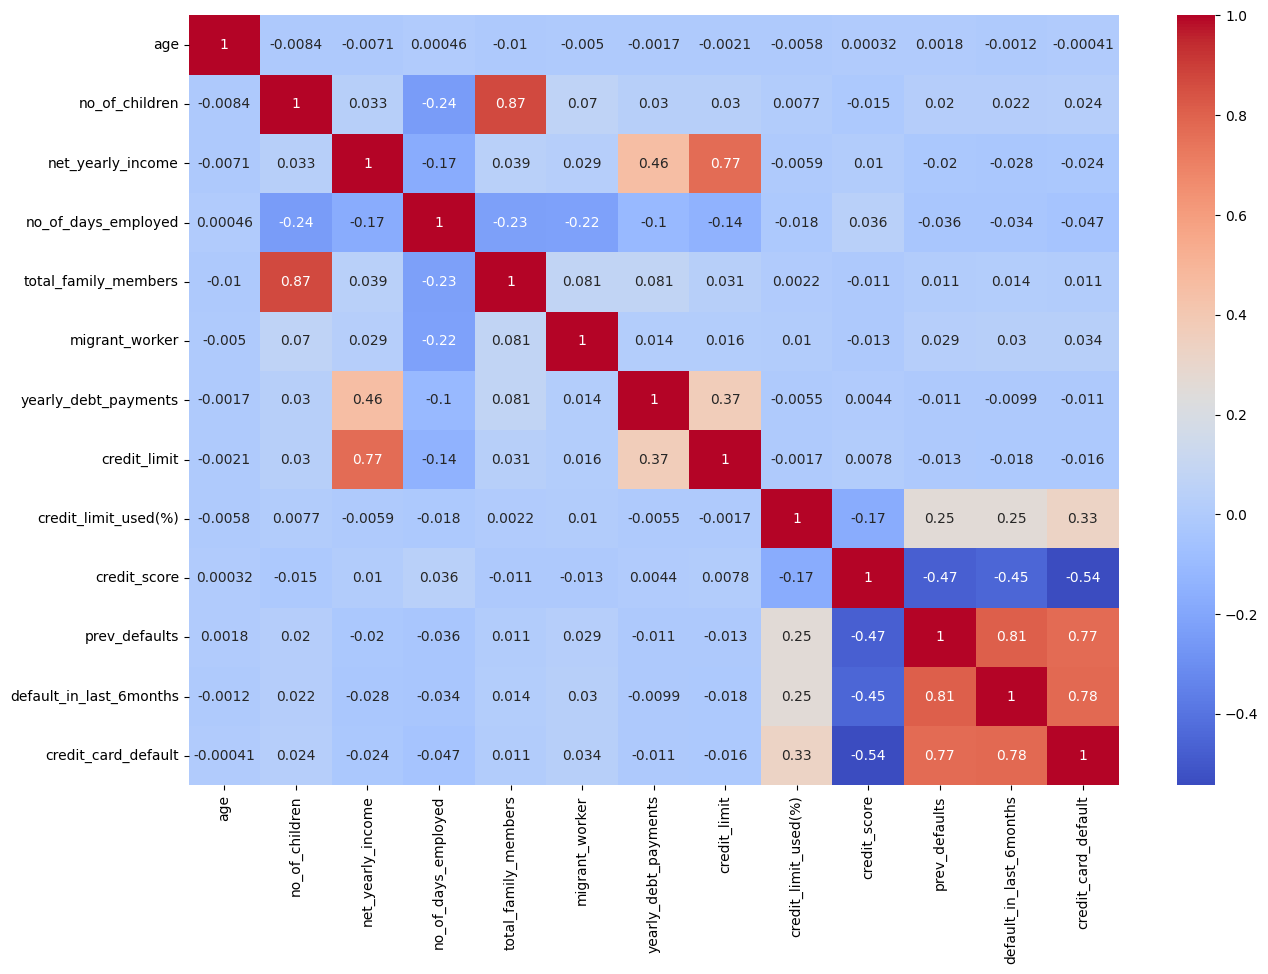

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# 8. Dropping features with low correlation with other features

From the above correlation matrix `correlation_matrix`, we can notice that the feature `age` doesn't have much correlation to other features in the table. Surprising but also makes sense as people of all ages can be susceptible to defaulting on their credit card debt. Maybe `age` can be a factor in other types of debt like mortgages.

In [25]:
threshold = 0.01
low_corr_features = correlation_matrix['credit_card_default'][abs(correlation_matrix['credit_card_default']) < threshold].index
correlation_matrix = correlation_matrix.replace('\n', '', regex=True)
print(low_corr_features)

Index(['age'], dtype='object')


Dropping the `age` column from the dataset:

In [26]:
# dropping column 'age' as its correlation with respect to dependent variable is less than threshold
df.drop(low_corr_features, axis=1, inplace=True)

C:\Users\chira\AppData\Local\Temp\ipykernel_24308\1154774727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(low_corr_features, axis=1, inplace=True)


Printing the number of columns after low correlated column with respect to the dependent variable "credit_card_default"

In [27]:
count = 1
for i in df.columns:
    print(count,i)
    count +=1

1 customer_id
2 name
3 gender
4 owns_car
5 owns_house
6 no_of_children
7 net_yearly_income
8 no_of_days_employed
9 occupation_type
10 total_family_members
11 migrant_worker
12 yearly_debt_payments
13 credit_limit
14 credit_limit_used(%)
15 credit_score
16 prev_defaults
17 default_in_last_6months
18 credit_card_default


# 9. Visualization

### i) Univariate Analysis: 


We want to see how many people own cars and how many people are males or females:
* Gender Distributiion
* Car Owner Distribution

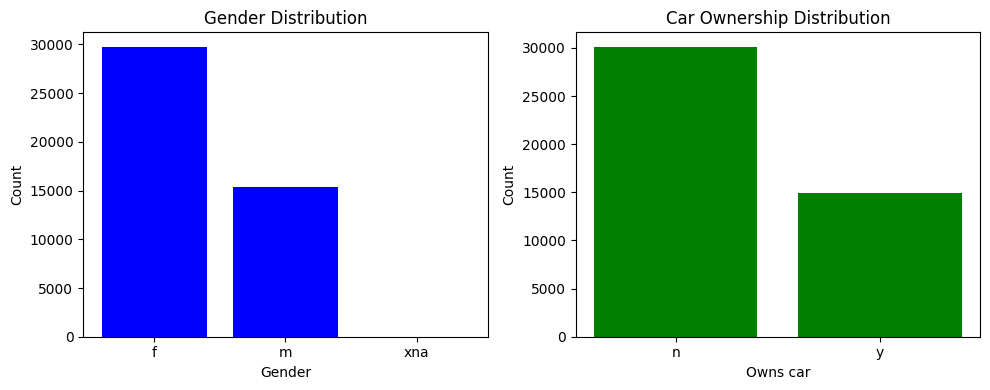

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,4))

gender_counts = df['gender'].value_counts()

axes[0].bar(gender_counts.index, gender_counts.values, color='blue')
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

car_counts = df['owns_car'].value_counts()
axes[1].bar(car_counts.index, car_counts.values, color='green')
axes[1].set_title('Car Ownership Distribution')
axes[1].set_xlabel('Owns car')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()

We can also see how the income levels of the people surveyed for this dataset are distributed:

### ii) Bivariate Analysis (Visualization)

a. Histogram of People who defaulted on their credit card debt based on their credit scores. The expectation is that people with lower credit scores should have higher rates of defaults:

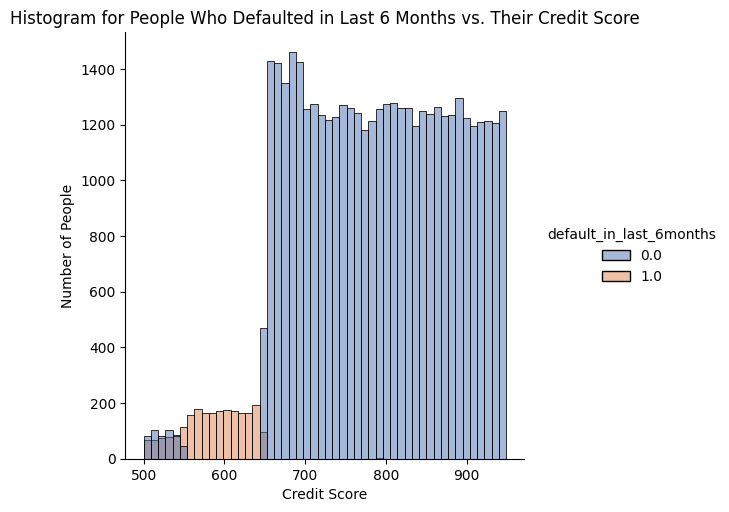

In [29]:
x = sns.displot(data=df, x='credit_score', hue='default_in_last_6months', kind='hist', palette='deep')
x.set_axis_labels("Credit Score", "Number of People")
plt.title("Histogram for People Who Defaulted in Last 6 Months vs. Their Credit Score")
plt.show()

As expected, we can see that defaults rates are higher for people with credit scores between 500 and 700, although, surprisingly, we can also see that for people with scores between 500 and 550 also have high rates of people who don't default on their debt!

b) Scatter Plot with Regression Line for net yearly income vs credit limit

Text(59.875, 0.5, 'Net Yearly Income (in Millions)')

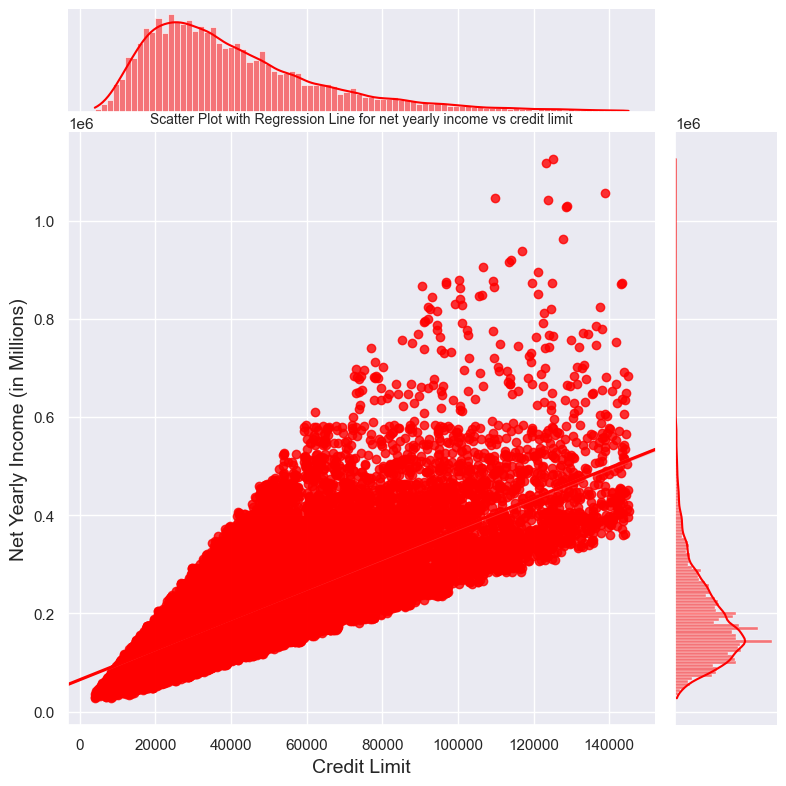

In [30]:
sns.set_theme(style='darkgrid')
graph = sns.jointplot(x='credit_limit', y='net_yearly_income', data=df, kind='reg', truncate=False, color='red', height=8)
graph.ax_joint.set_title('Scatter Plot with Regression Line for net yearly income vs credit limit', fontsize=10, zorder=10)
graph.ax_joint.set_xlabel('Credit Limit', fontsize=14)
graph.ax_joint.set_ylabel('Net Yearly Income (in Millions)', fontsize=14)

As expected, we can notice a clear linear relationship between `Net Yearly Income` and their `Credit Limits`. We also notice that, the credit limits for individuals seem to be 100% of their yearly incomes. This is because, both these features are positively skewed to the same extent

### iii) Multivariate Analysis 

a. Checking whether the chances of someone defaulting on their credit card debt is related to their occupation types **and** gender

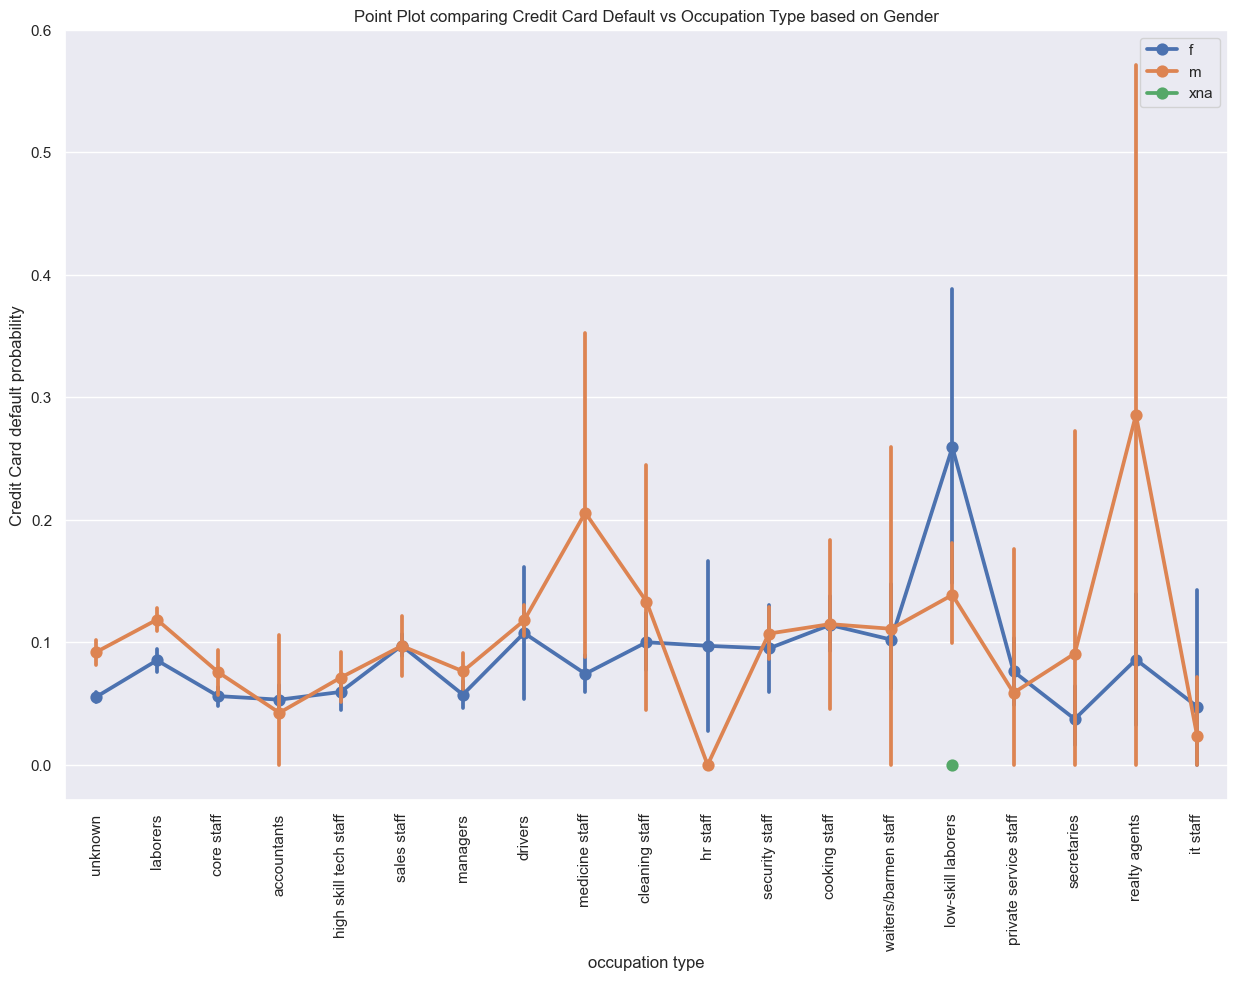

In [31]:
plt.figure(figsize=(15,10))
sns.pointplot(x=df['occupation_type'], y=df['credit_card_default'], hue='gender', data=df)
plt.xlabel('occupation type')
plt.ylabel("Credit Card default probability")
plt.title('Point Plot comparing Credit Card Default vs Occupation Type based on Gender')
plt.legend()
plt.xticks(rotation=90)
plt.show()

From the above graph, we can conclude the following observations:
* people in certain professions are more prone to defualting on their credit card debt.
* One can also notice that women are generally less prone to defaulting on their credit. Although one exception to that is women working as `low-skill laborers` are more prone to defaulting on their debt but once again noting that there is a high degree of variability in such occurences

# 10. Normalization of Numerical Data

***Normalization*** allows us to ensure that the values of one column don't influence the results of analytical values just because of their scale. A simple example being that a feature which is in *thousands* scale will dominate more compared to another feature whose values are in the *single digits*

In [32]:
# creating an instance of StandardScaler class:
import joblib
scaler = StandardScaler()
numeric_columns = ['no_of_children','net_yearly_income','no_of_days_employed', 'total_family_members','migrant_worker','yearly_debt_payments','credit_limit','credit_limit_used(%)','credit_score']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Save the scaler parameters
# joblib.dump(scaler, "standard_scaler.pkl")

C:\Users\chira\AppData\Local\Temp\ipykernel_24308\2581154382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [33]:
df.isna().sum()

customer_id                0
name                       0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

# 11. Exporting Preprocessed and EDA file for future use 

Saving the preprocessed and cleaned data into a new file so that we can run *Statistical* and *ML* models on it in the future

In [34]:
file_path = "./train_preprocessed.csv"
df.to_csv(file_path, index=False)
print("CSV file created successfully")

CSV file created successfully


# 12. References

The following resources have been used to find the functions that have been used in the above exercise:
1. [Pandas Documentation](https://pandas.pydata.org/docs/reference/index.html)
2. [Seaborn Reference](https://seaborn.pydata.org/api.html)
3. [Matplotlib User Guide](https://matplotlib.org/stable/users/index.html)
4. [Scikit Learn User Guide](https://scikit-learn.org/stable/user_guide.html)
5. [Scipy Stats object](https://docs.scipy.org/doc/scipy/reference/stats.html)

# Project - Phase 2

## Applying logistic Regression 

In [35]:
df.dtypes

customer_id                 object
name                        object
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)       float64
credit_score               float64
prev_defaults              float64
default_in_last_6months    float64
credit_card_default        float64
dtype: object

In [36]:
df.columns

Index(['customer_id', 'name', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

In [37]:
selected_columns = ['gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default']
dfClass = df[selected_columns]

In [38]:
df

,customer_id,name,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,cst_115179,ita bose,f,n,y,-0.584803,-0.872667,-0.484429,unknown,-1.271150,2.141906,0.091362,-0.937908,0.706362,-2.372152,2.0,1.0,1.0
1,cst_121920,alper jonathan,m,n,y,-0.584803,-0.852706,-0.468912,laborers,-0.172854,-0.467382,-0.966201,-0.145999,-0.008486,0.738093,0.0,0.0,0.0
2,cst_109330,umesh desai,m,n,y,-0.584803,0.392307,-0.487361,laborers,-0.172854,-0.467382,1.006188,0.014142,-0.314849,-1.318842,0.0,0.0,0.0
3,cst_128288,rie,f,n,y,-0.584803,-0.723712,-0.403005,core staff,-0.172854,-0.467382,-0.534322,-0.358683,-1.097778,-0.285406,0.0,0.0,0.0
4,cst_151355,mccool,m,y,y,-0.584803,2.018641,-0.478341,core staff,-1.271150,-0.467382,0.402100,0.485951,0.774442,1.433675,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,cst_130421,doris,f,n,n,2.197743,-0.994037,-0.487986,unknown,2.023738,-0.467382,-1.210610,-0.481866,1.012725,1.234938,0.0,0.0,0.0
45524,cst_136670,luciana,f,n,y,-0.584803,1.979215,-0.481884,accountants,-0.172854,2.141906,0.705344,4.101591,-0.689293,-1.030672,0.0,0.0,0.0
45525,cst_145435,jessica,f,n,y,-0.584803,0.701764,-0.478621,core staff,-0.172854,-0.467382,-0.526384,1.774799,-0.212728,-0.553702,0.0,0.0,0.0
45526,cst_130913,tessa,m,y,n,-0.584803,-0.361074,-0.471168,laborers,-0.172854,-0.467382,-0.678837,-0.653309,1.353129,0.221375,0.0,0.0,0.0


In [39]:
encoded_data = pd.get_dummies(dfClass.iloc[:,:-1], drop_first=True)
encoded_data.columns

Index(['no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'gender_m', 'gender_xna', 'owns_car_y',
       'owns_house_y', 'occupation_type_cleaning staff',
       'occupation_type_cooking staff', 'occupation_type_core staff',
       'occupation_type_drivers', 'occupation_type_high skill tech staff',
       'occupation_type_hr staff', 'occupation_type_it staff',
       'occupation_type_laborers', 'occupation_type_low-skill laborers',
       'occupation_type_managers', 'occupation_type_medicine staff',
       'occupation_type_private service staff',
       'occupation_type_realty agents', 'occupation_type_sales staff',
       'occupation_type_secretaries', 'occupation_type_security staff',
       'occupation_type_unknown', 'occupation_type_waiters/barmen staff'],
      dtype='object')

In [40]:
list = ['default_in_last_6months', 'gender_M', 'gender_XNA', 'owns_car_Y',
       'owns_house_Y', 'occupation_type_Cleaning staff',
       'occupation_type_Cooking staff', 'occupation_type_Core staff',
       'occupation_type_Drivers', 'occupation_type_HR staff',
       'occupation_type_High skill tech staff', 'occupation_type_IT staff',
       'occupation_type_Laborers', 'occupation_type_Low-skill Laborers',
       'occupation_type_Managers', 'occupation_type_Medicine staff',
       'occupation_type_Private service staff',
       'occupation_type_Realty agents', 'occupation_type_Sales staff',
       'occupation_type_Secretaries', 'occupation_type_Security staff',
       'occupation_type_Unknown', 'occupation_type_Waiters/barmen staff']
# encoded_data.occupation_type_Laborers[0]


In [41]:
df2 = encoded_data
df2

,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_low-skill laborers,occupation_type_managers,occupation_type_medicine staff,occupation_type_private service staff,occupation_type_realty agents,occupation_type_sales staff,occupation_type_secretaries,occupation_type_security staff,occupation_type_unknown,occupation_type_waiters/barmen staff
0,-0.584803,-0.872667,-0.484429,-1.271150,2.141906,0.091362,-0.937908,0.706362,-2.372152,2.0,...,False,False,False,False,False,False,False,False,True,False
1,-0.584803,-0.852706,-0.468912,-0.172854,-0.467382,-0.966201,-0.145999,-0.008486,0.738093,0.0,...,False,False,False,False,False,False,False,False,False,False
2,-0.584803,0.392307,-0.487361,-0.172854,-0.467382,1.006188,0.014142,-0.314849,-1.318842,0.0,...,False,False,False,False,False,False,False,False,False,False
3,-0.584803,-0.723712,-0.403005,-0.172854,-0.467382,-0.534322,-0.358683,-1.097778,-0.285406,0.0,...,False,False,False,False,False,False,False,False,False,False
4,-0.584803,2.018641,-0.478341,-1.271150,-0.467382,0.402100,0.485951,0.774442,1.433675,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,2.197743,-0.994037,-0.487986,2.023738,-0.467382,-1.210610,-0.481866,1.012725,1.234938,0.0,...,False,False,False,False,False,False,False,False,True,False
45524,-0.584803,1.979215,-0.481884,-0.172854,2.141906,0.705344,4.101591,-0.689293,-1.030672,0.0,...,False,False,False,False,False,False,False,False,False,False
45525,-0.584803,0.701764,-0.478621,-0.172854,-0.467382,-0.526384,1.774799,-0.212728,-0.553702,0.0,...,False,False,False,False,False,False,False,False,False,False
45526,-0.584803,-0.361074,-0.471168,-0.172854,-0.467382,-0.678837,-0.653309,1.353129,0.221375,0.0,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df2 = pd.concat([df2,df["credit_card_default"]], axis=1)
df2

,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_managers,occupation_type_medicine staff,occupation_type_private service staff,occupation_type_realty agents,occupation_type_sales staff,occupation_type_secretaries,occupation_type_security staff,occupation_type_unknown,occupation_type_waiters/barmen staff,credit_card_default
0,-0.584803,-0.872667,-0.484429,-1.271150,2.141906,0.091362,-0.937908,0.706362,-2.372152,2.0,...,False,False,False,False,False,False,False,True,False,1.0
1,-0.584803,-0.852706,-0.468912,-0.172854,-0.467382,-0.966201,-0.145999,-0.008486,0.738093,0.0,...,False,False,False,False,False,False,False,False,False,0.0
2,-0.584803,0.392307,-0.487361,-0.172854,-0.467382,1.006188,0.014142,-0.314849,-1.318842,0.0,...,False,False,False,False,False,False,False,False,False,0.0
3,-0.584803,-0.723712,-0.403005,-0.172854,-0.467382,-0.534322,-0.358683,-1.097778,-0.285406,0.0,...,False,False,False,False,False,False,False,False,False,0.0
4,-0.584803,2.018641,-0.478341,-1.271150,-0.467382,0.402100,0.485951,0.774442,1.433675,0.0,...,False,False,False,False,False,False,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,2.197743,-0.994037,-0.487986,2.023738,-0.467382,-1.210610,-0.481866,1.012725,1.234938,0.0,...,False,False,False,False,False,False,False,True,False,0.0
45524,-0.584803,1.979215,-0.481884,-0.172854,2.141906,0.705344,4.101591,-0.689293,-1.030672,0.0,...,False,False,False,False,False,False,False,False,False,0.0
45525,-0.584803,0.701764,-0.478621,-0.172854,-0.467382,-0.526384,1.774799,-0.212728,-0.553702,0.0,...,False,False,False,False,False,False,False,False,False,0.0
45526,-0.584803,-0.361074,-0.471168,-0.172854,-0.467382,-0.678837,-0.653309,1.353129,0.221375,0.0,...,False,False,False,False,False,False,False,False,False,0.0


In [43]:
df2.columns

Index(['no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'gender_m', 'gender_xna', 'owns_car_y',
       'owns_house_y', 'occupation_type_cleaning staff',
       'occupation_type_cooking staff', 'occupation_type_core staff',
       'occupation_type_drivers', 'occupation_type_high skill tech staff',
       'occupation_type_hr staff', 'occupation_type_it staff',
       'occupation_type_laborers', 'occupation_type_low-skill laborers',
       'occupation_type_managers', 'occupation_type_medicine staff',
       'occupation_type_private service staff',
       'occupation_type_realty agents', 'occupation_type_sales staff',
       'occupation_type_secretaries', 'occupation_type_security staff',
       'occupation_type_unknown', 'occupation_type_waiters/barmen staff',
       'credit_card_default'],
 

In [44]:
df2.isna().sum()

no_of_children                           0
net_yearly_income                        0
no_of_days_employed                      0
total_family_members                     0
migrant_worker                           0
yearly_debt_payments                     0
credit_limit                             0
credit_limit_used(%)                     0
credit_score                             0
prev_defaults                            0
default_in_last_6months                  0
gender_m                                 0
gender_xna                               0
owns_car_y                               0
owns_house_y                             0
occupation_type_cleaning staff           0
occupation_type_cooking staff            0
occupation_type_core staff               0
occupation_type_drivers                  0
occupation_type_high skill tech staff    0
occupation_type_hr staff                 0
occupation_type_it staff                 0
occupation_type_laborers                 0
occupation_

In [45]:
df2.dtypes

no_of_children                           float64
net_yearly_income                        float64
no_of_days_employed                      float64
total_family_members                     float64
migrant_worker                           float64
yearly_debt_payments                     float64
credit_limit                             float64
credit_limit_used(%)                     float64
credit_score                             float64
prev_defaults                            float64
default_in_last_6months                  float64
gender_m                                    bool
gender_xna                                  bool
owns_car_y                                  bool
owns_house_y                                bool
occupation_type_cleaning staff              bool
occupation_type_cooking staff               bool
occupation_type_core staff                  bool
occupation_type_drivers                     bool
occupation_type_high skill tech staff       bool
occupation_type_hr s

## 1) Logistic Regression

The test accuracy of our model is: 0.9791458679977815
The precision score of our Logistic regression model is 0.9458128078817734
F1 score  0.85970
Recall score  0.78796
Confusion matrix is as shown below: 
[[8251   33]
 [ 155  576]]


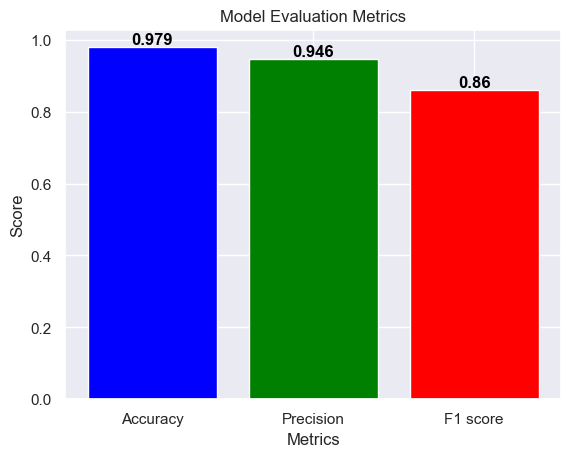

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score

#Separating feature variables from target
X = df2.iloc[:, :-1]
y = df2.iloc[:,-1]

#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#model instance created with penalty , solver
model = LogisticRegression(penalty='l1', solver = 'liblinear', C = 10)

#fitting the model for training data
model.fit(X_train, y_train)

# prediction on test data

y_pred = model.predict(X_test)

#accuracy calculation
accuracy = accuracy_score(y_test, y_pred)

print("The test accuracy of our model is: {}".format(accuracy))

#calculating precision
precision = precision_score(y_test,y_pred)
print("The precision score of our Logistic regression model is {}".format(precision))

#calculating F1 score
f1Score = f1_score(y_test,y_pred)
print("F1 score  {:.5f}".format(f1Score))

#calculating recall score
recallScore = recall_score(y_test, y_pred)
print("Recall score  {:.5f}".format(recallScore))

#calculating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print("Confusion matrix is as shown below: ")
print(conf_mat)

labels = ['Accuracy', 'Precision', 'F1 score']
scores = [accuracy, precision, f1Score]

fig, ax = plt.subplots()

bars = ax.bar(labels, scores, color = ['blue', 'green', 'red'])

#plotting precision, recall, accuracy in one graph
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha = 'center', va = 'bottom', color = 'black', fontweight='bold')

plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')

plt.show()

## 2) Support Vector Machine

The test accuracy of our SVM model is 0.98136
The precision score of our SVM model is 1.00000
F1 score for SVM - 0.87017
Recall score  0.77018
Confusion matrix using SVM is as shown below: 
[[8284    0]
 [ 168  563]]


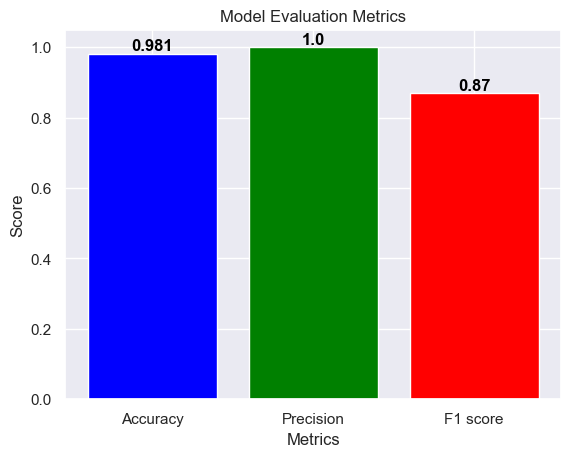

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score


#model instance for SVM
svmClassifier = SVC(kernel='linear')

#  Training the SVC classifier
svmClassifier.fit(X_train, y_train)

# prediction on test data
y_pred = svmClassifier.predict(X_test)

#accuracy calculation
accuracy = accuracy_score(y_test, y_pred)

print("The test accuracy of our SVM model is {:.5f}".format(accuracy))

#calculating precision
precision = precision_score(y_test,y_pred)
print("The precision score of our SVM model is {:.5f}".format(precision))

#calculating F1 score
f1Score = f1_score(y_test,y_pred)
print("F1 score for SVM - {:.5f}".format(f1Score))

#calculating recall score
recallScore = recall_score(y_test, y_pred)
print("Recall score  {:.5f}".format(recallScore))

#calculating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print("Confusion matrix using SVM is as shown below: ")
print(conf_mat)

labels = ['Accuracy', 'Precision', 'F1 score']
scores = [accuracy, precision, f1Score]

fig, ax = plt.subplots()

bars = ax.bar(labels, scores, color = ['blue', 'green', 'red'])

#plotting precision, recall, accuracy in one graph
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha = 'center', va = 'bottom', color = 'black', fontweight='bold')

plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')

plt.show()

## 3)XGBoost

The test accuracy of our XGBoost model is 0.98136
The precision score of our XGBoost model is 1.00000
F1 score for XGBoost - 0.87017
Recall score  0.77018
Confusion matrix using XGBoost is as shown below: 
[[8284    0]
 [ 168  563]]


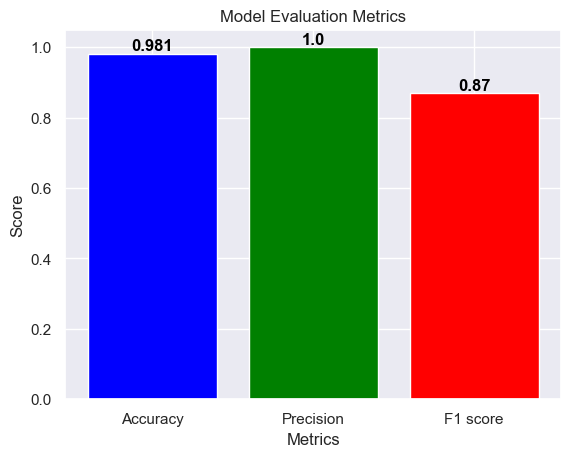

In [48]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score
import pickle
#total sample count
totalSamples = len(y_train)

#calculating the count of positive and negative samples
positive_samples_count = (y_train == 1.0).sum()
negative_samples_count = totalSamples - positive_samples_count
ratio = negative_samples_count / positive_samples_count

#calculating class ratio and class weight
classRatio = len(y_train) - sum(y_train) / sum(y_train)
classWeight = {0.0: 1, 1.0: 5}

# Creating instance of XGBoost model and giving hyperparameters

model = xgb.XGBClassifier(n_estimators = 15, random_state = 42, scale_pos_weight = classRatio/20000)

model.fit(X_train, y_train)


# # Save the trained model to a pickle file
# model_filename = "xgboost_model.pkl"
# with open(model_filename, 'wb') as model_file:
#     pickle.dump(model, model_file)

# print(f"XGBoost model saved to {model_filename}")

#accuracy calculation
accuracy = accuracy_score(y_test, y_pred)

print("The test accuracy of our XGBoost model is {:.5f}".format(accuracy))

#calculating precision
precision = precision_score(y_test,y_pred)
print("The precision score of our XGBoost model is {:.5f}".format(precision))

#calculating F1 score
f1Score = f1_score(y_test,y_pred)
print("F1 score for XGBoost - {:.5f}".format(f1Score))

#calculating recall score
recallScore = recall_score(y_test, y_pred)
print("Recall score  {:.5f}".format(recallScore))

#calculating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print("Confusion matrix using XGBoost is as shown below: ")
print(conf_mat)

labels = ['Accuracy', 'Precision', 'F1 score']
scores = [accuracy, precision, f1Score]

fig, ax = plt.subplots()

bars = ax.bar(labels, scores, color = ['blue', 'green', 'red'])

#plotting precision, recall, accuracy in one graph
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha = 'center', va = 'bottom', color = 'black', fontweight='bold')

plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')

plt.show()

## 4) Random Forest Classifier

Accuracy on the train data is: 0.9999167984025293
Accuracy of the Random forest classifier model is: 0.9799223516361619
Precision of the random forest classifier model is: 0.9435483870967742
Recall of the random forest classifier model is: 0.8002735978112175
f1 score of the random forest classifier model is: 0.8660251665433013
Confusion Matrix:


Text(0, 0.5, 'Score')

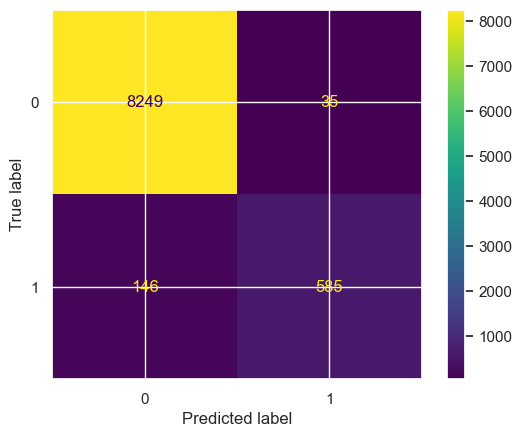

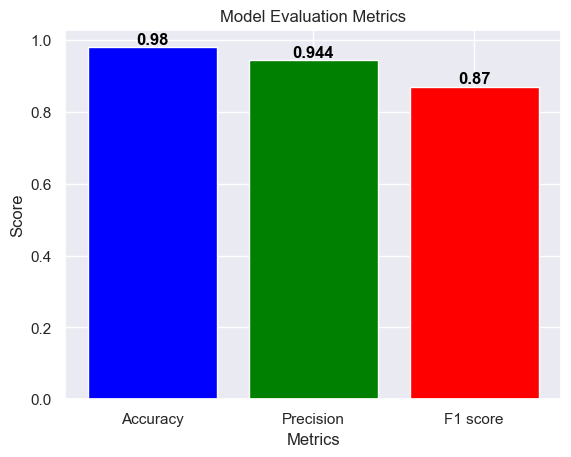

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Segregating dependent(X) and independent variable(y)
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# defining class weights
class_weights = {0.0: 1, 1.0: 55}

# Creating a random forest classifier
model = RandomForestClassifier(n_estimators=50, random_state=42, ccp_alpha=0.00001, class_weight=class_weights)

# Fit the model of the training data 
model.fit(X_train, y_train)
train_prediction = model.predict(X_train)

# Running my model on the test data
y_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, train_prediction)
print("Accuracy on the train data is:",accuracy_train)

# Calculating accuracy of the model on the test data 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Random forest classifier model is:",accuracy)

# Calculate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision of the random forest classifier model is:",precision)

# Calculate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall of the random forest classifier model is:",recall)

# calculate the f1_score of the model
f1_score = f1_score(y_test, y_pred)
print("f1 score of the random forest classifier model is:", f1_score)

# Calculating different performance metrics for the model
print("Confusion Matrix:\n", ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot())


labels = ['Accuracy', 'Precision', 'F1 score']
scores = [accuracy, precision, f1Score]

fig, ax = plt.subplots()

bars = ax.bar(labels, scores, color = ['blue', 'green', 'red'])

#plotting precision, recall, accuracy in one graph
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha = 'center', va = 'bottom', color = 'black', fontweight='bold')

plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')


## 5) Decision Tree Classifier

Accuracy of the train data is: 0.9985855728429985
The accuracy of the decision tree model is: 0.9743760399334442
Precision of the decision tree model is: 0.8351206434316354
Recall of the decision tree model is: 0.8522571819425444
f1 score of the decision tree model is: 0.8436018957345971
Confusion Matrix:


Text(0, 0.5, 'Score')

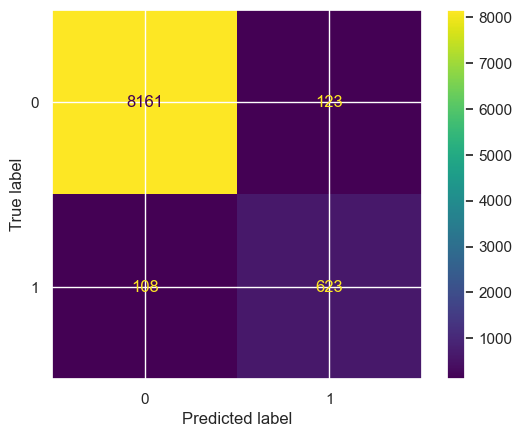

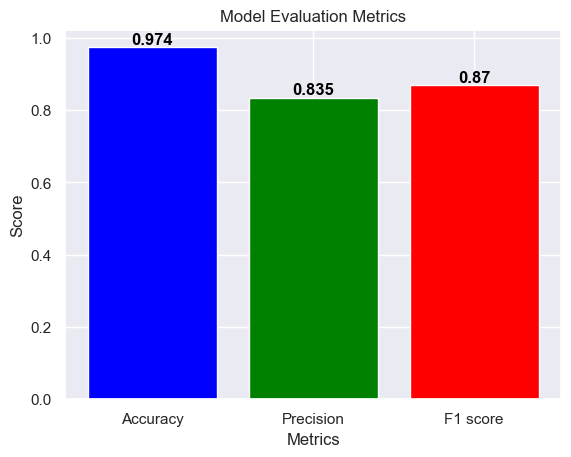

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Segregating dependent(X) and independent variable(y)
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# defining class weights
class_weights = {0.0: 1, 1.0: 55}

# Create a Decision Tree Model
model = DecisionTreeClassifier(ccp_alpha=0.00001, class_weight=class_weights, random_state=42)

# Fir the model to the training data 
model.fit(X_train, y_train)
train_prediction = model.predict(X_train)

# Make prediction on the test data 
y_pred = model.predict(X_test)
accuracyTrain = accuracy_score(y_train, train_prediction)
print("Accuracy of the train data is:",accuracyTrain)

# Calculate the accuracy of the model on the test data 
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the decision tree model is:", accuracy)

# Calculate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision of the decision tree model is:",precision)

# Calculate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall of the decision tree model is:",recall)

# calculate the f1_score of the model
f1_score = f1_score(y_test, y_pred)
print("f1 score of the decision tree model is:", f1_score)

# Calculating different performance metrics for the model
print("Confusion Matrix:\n", ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot())

labels = ['Accuracy', 'Precision', 'F1 score']
scores = [accuracy, precision, f1Score]

fig, ax = plt.subplots()

bars = ax.bar(labels, scores, color = ['blue', 'green', 'red'])

#plotting precision, recall, accuracy in one graph
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha = 'center', va = 'bottom', color = 'black', fontweight='bold')

plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')


## 6) KNN Classifier

Accuracy for the train data is: 0.9814183098982168
Accuracy of the KNN model is: 0.9785912368275097
Precision of the KNN model is: 0.9670138888888888
Recall of the KNN model is: 0.761969904240766
f1 score of the KNN model is: 0.8523335883703137
Confusion Matrix:


Text(0, 0.5, 'Score')

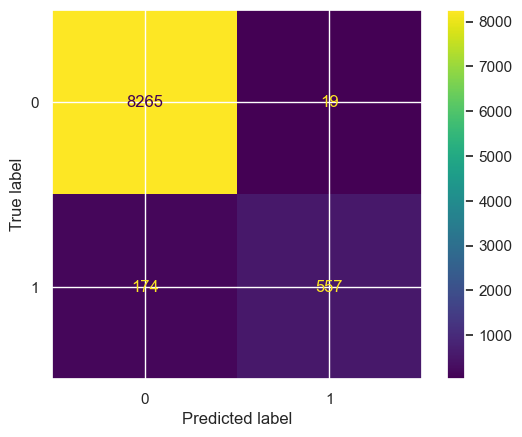

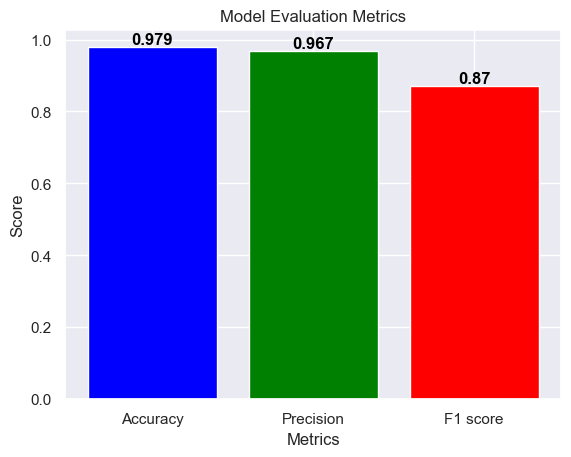

In [51]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# segregating the dataset in (X) and (Y)
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating model classifier
model = KNeighborsClassifier(n_neighbors=5) 

# Fit the model to the training data
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_predict_train)
print("Accuracy for the train data is:", train_accuracy)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the KNN model is:", accuracy)

# Calculate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision of the KNN model is:",precision)

# Calculate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall of the KNN model is:",recall)

# calculate the f1_score of the model
f1_score = f1_score(y_test, y_pred)
print("f1 score of the KNN model is:", f1_score)

# Calculating different performance metrics for the model
print("Confusion Matrix:\n", ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot())

labels = ['Accuracy', 'Precision', 'F1 score']
scores = [accuracy, precision, f1Score]

fig, ax = plt.subplots()

bars = ax.bar(labels, scores, color = ['blue', 'green', 'red'])

#plotting precision, recall, accuracy in one graph
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha = 'center', va = 'bottom', color = 'black', fontweight='bold')

plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')

# References Used:
#### 1) Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
##### 2) Support Vector Machine: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
##### 3) XGBoost: https://xgboost.readthedocs.io/en/stable/python/sklearn_estimator.html
##### 4) Random Forest Classifier:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
##### 5) Decision Tree Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
##### 6) KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
##### 7) Sklearn Confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# Project Phase: 3

### Visualization for user reference and feedback

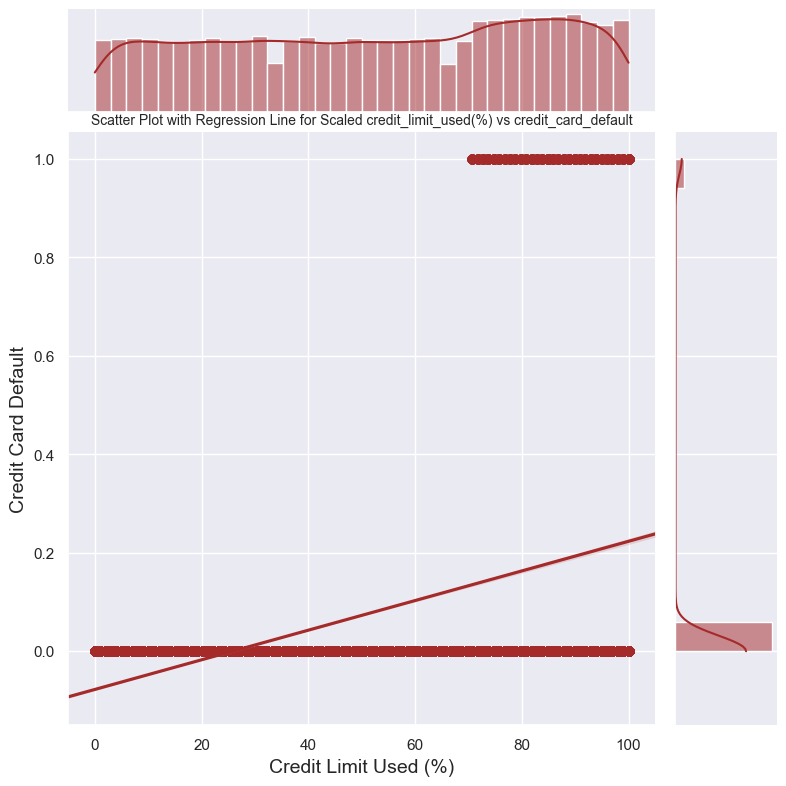

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style='darkgrid')

# Create a copy of the dataframe
df_scaled = df.copy()

# Scale 'credit_limit_used(%)' to be between 0 and 100
scaler = MinMaxScaler(feature_range=(0, 100))
df_scaled['credit_limit_used_scaled'] = scaler.fit_transform(df[['credit_limit_used(%)']])

# Joint plot for scaled credit_limit_used(%) vs credit_card_default
graph = sns.jointplot(x='credit_limit_used_scaled', y='credit_card_default', data=df_scaled, kind='reg', truncate=False, color='brown', height=8)
graph.ax_joint.set_title('Scatter Plot with Regression Line for Scaled credit_limit_used(%) vs credit_card_default', fontsize=10, zorder=10)
graph.ax_joint.set_xlabel('Credit Limit Used (%)', fontsize=14)
graph.ax_joint.set_ylabel('Credit Card Default', fontsize=14)

plt.show()


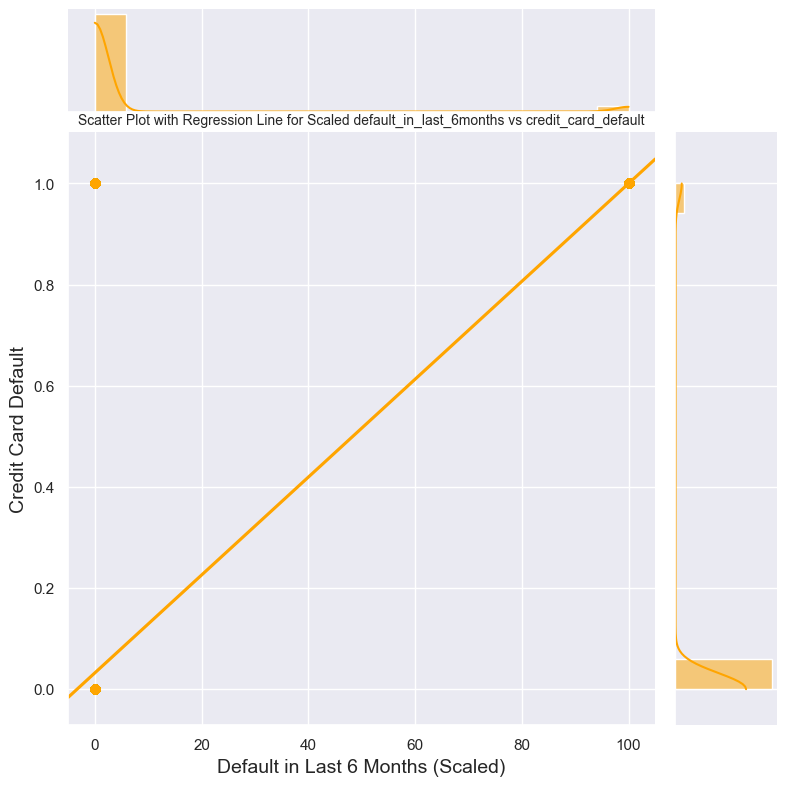

In [53]:
# Scale 'default_in_last_6months' to be between 0 and 100
df_scaled['default_in_last_6months_scaled'] = scaler.fit_transform(df[['default_in_last_6months']])

# Joint plot for scaled default_in_last_6months vs credit_card_default
graph_default = sns.jointplot(x='default_in_last_6months_scaled', y='credit_card_default', data=df_scaled, kind='reg', truncate=False, color='orange', height=8)
graph_default.ax_joint.set_title('Scatter Plot with Regression Line for Scaled default_in_last_6months vs credit_card_default', fontsize=10, zorder=10)
graph_default.ax_joint.set_xlabel('Default in Last 6 Months (Scaled)', fontsize=14)
graph_default.ax_joint.set_ylabel('Credit Card Default', fontsize=14)

plt.show()


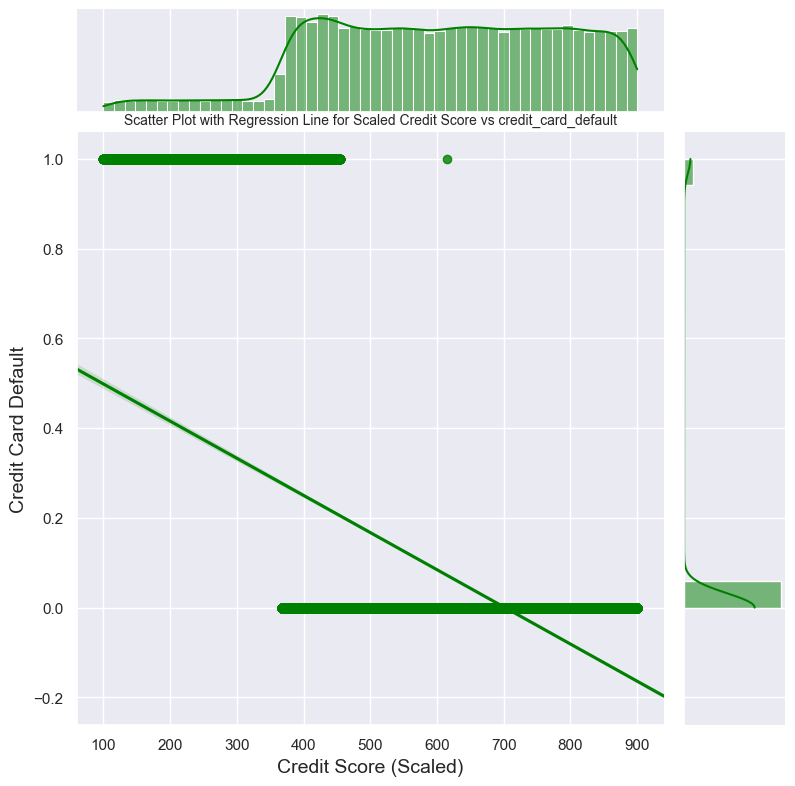

In [54]:
# Scale 'credit_score' to be between 0 and 100
scalerc = MinMaxScaler(feature_range=(100, 900))
df_scaled['credit_score_scaled'] = scalerc.fit_transform(df[['credit_score']])

# Joint plot for scaled credit_score vs credit_card_default
graph_score = sns.jointplot(x='credit_score_scaled', y='credit_card_default', data=df_scaled, kind='reg', truncate=False, color='green', height=8)
graph_score.ax_joint.set_title('Scatter Plot with Regression Line for Scaled Credit Score vs credit_card_default', fontsize=10, zorder=10)
graph_score.ax_joint.set_xlabel('Credit Score (Scaled)', fontsize=14)
graph_score.ax_joint.set_ylabel('Credit Card Default', fontsize=14)

plt.show()


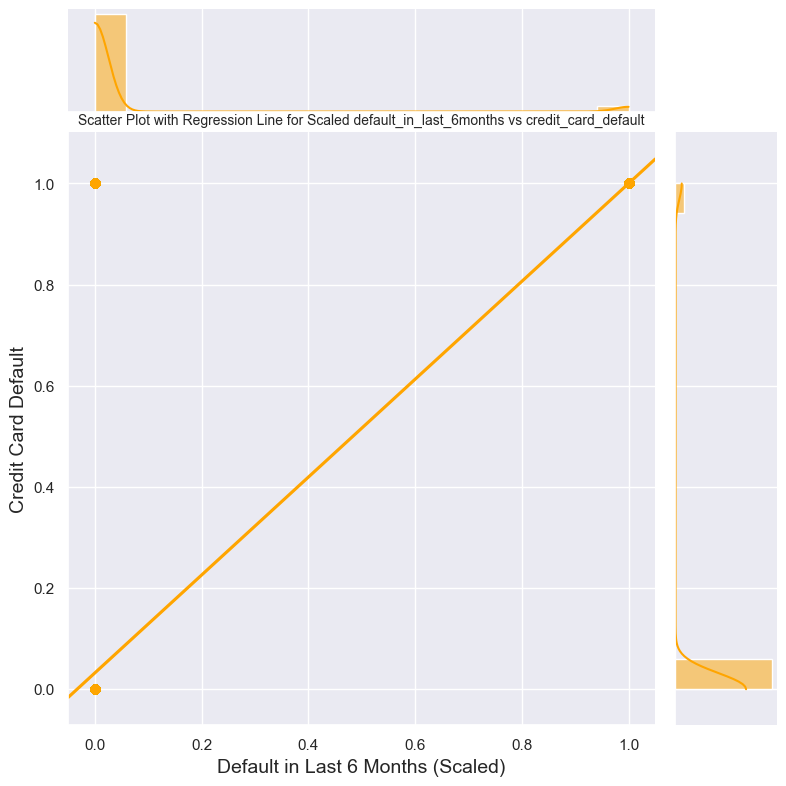

In [55]:
# Scale 'credit_score' to be between 0 and 100
scalerd = MinMaxScaler(feature_range=(0, 1))
df_scaled['default_in_last_6months_scaled'] = scalerd.fit_transform(df[['default_in_last_6months']])

# Joint plot for scaled default_in_last_6months vs credit_card_default
graph_default = sns.jointplot(x='default_in_last_6months_scaled', y='credit_card_default', data=df_scaled, kind='reg', truncate=False, color='orange', height=8)
graph_default.ax_joint.set_title('Scatter Plot with Regression Line for Scaled default_in_last_6months vs credit_card_default', fontsize=10, zorder=10)
graph_default.ax_joint.set_xlabel('Default in Last 6 Months (Scaled)', fontsize=14)
graph_default.ax_joint.set_ylabel('Credit Card Default', fontsize=14)

plt.show()